<a href="https://colab.research.google.com/github/aniskoubaa/CS102/blob/master/CHAPTER_5_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: load advertising data vs sales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the advertising data set
df = pd.read_csv("https://riotu-lab.org/cs313/advertising.csv")

df.head()


,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


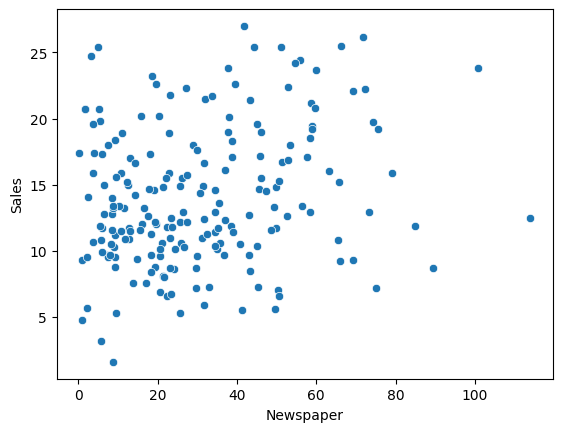

In [ ]:
# Create a scatter plot with sales as the y-axis and advertising spend as the x-axis
sns.scatterplot(x = "Newspaper", y = "Sales", data = df)
plt.show()

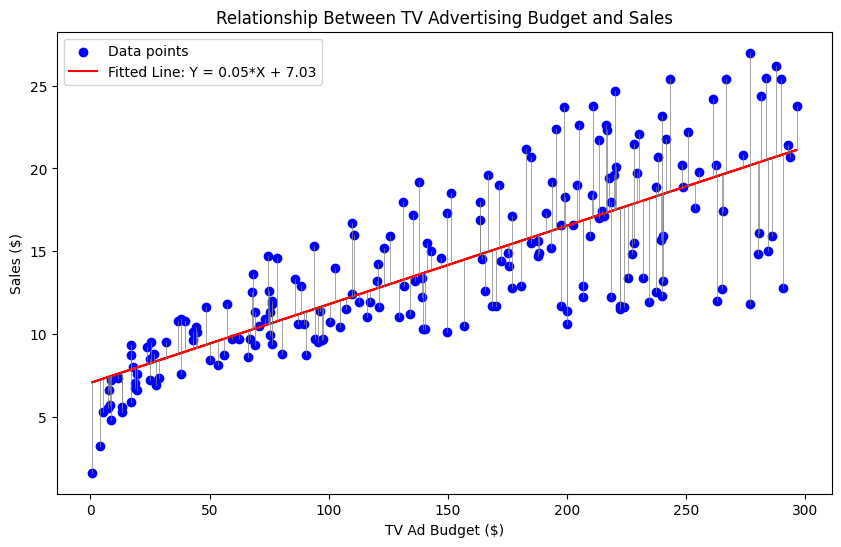

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://riotu-lab.org/cs313/advertising.csv"
data = pd.read_csv(url)

# Extract TV advertising budget and sales data
X = data['TV']
Y = data['Sales']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')

# Calculate the regression line
m, b = np.polyfit(X, Y, 1)  # m = slope, b = intercept

# Plot the regression line
plt.plot(X, m*X + b, color='red', label=f'Fitted Line: Y = {m:.2f}*X + {b:.2f}')

# Draw thin gray lines from each point to the regression line
for x, y in zip(X, Y):
    plt.plot([x, x], [y, m*x + b], color='gray', linewidth=0.5)

# Adding labels and title
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship Between TV Advertising Budget and Sales')
plt.legend()

# Show the plot
plt.show()


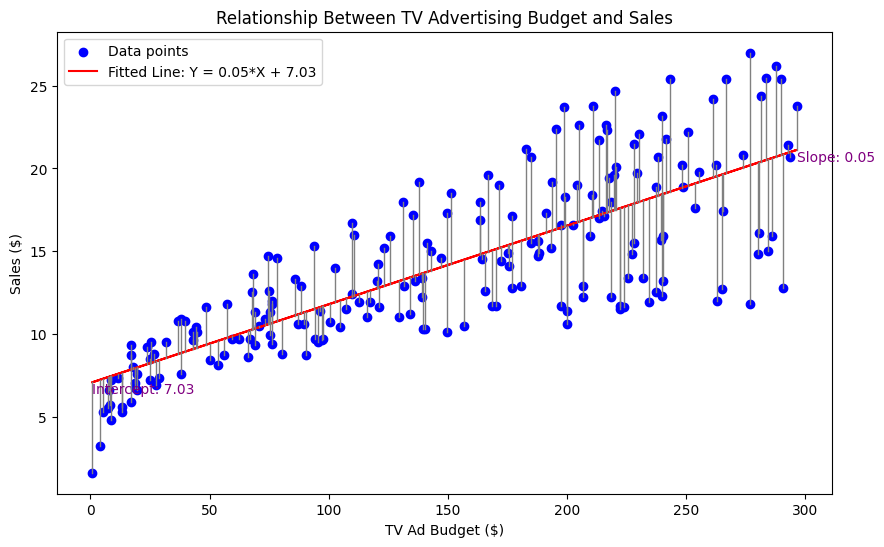

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://riotu-lab.org/cs313/advertising.csv"
data = pd.read_csv(url)

# Extract TV advertising budget and sales data
X = data['TV']
Y = data['Sales']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')

# Calculate the regression line
m, b = np.polyfit(X, Y, 1)  # m = slope, b = intercept

# Plot the regression line
plt.plot(X, m*X + b, color='red', label=f'Fitted Line: Y = {m:.2f}*X + {b:.2f}')

# Draw thin gray lines from each point to the regression line
for x, y in zip(X, Y):
    plt.plot([x, x], [y, m*x + b], color='gray', linewidth=1)

# Adding labels and title
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship Between TV Advertising Budget and Sales')

# Annotate slope and intercept
plt.text(X.min(), m*X.min() + b, f'Intercept: {b:.2f}', verticalalignment='top', color='purple')
plt.text(X.max(), m*X.max() + b, f'Slope: {m:.2f}', verticalalignment='top', color='purple')

plt.legend()

# Show the plot
plt.show()


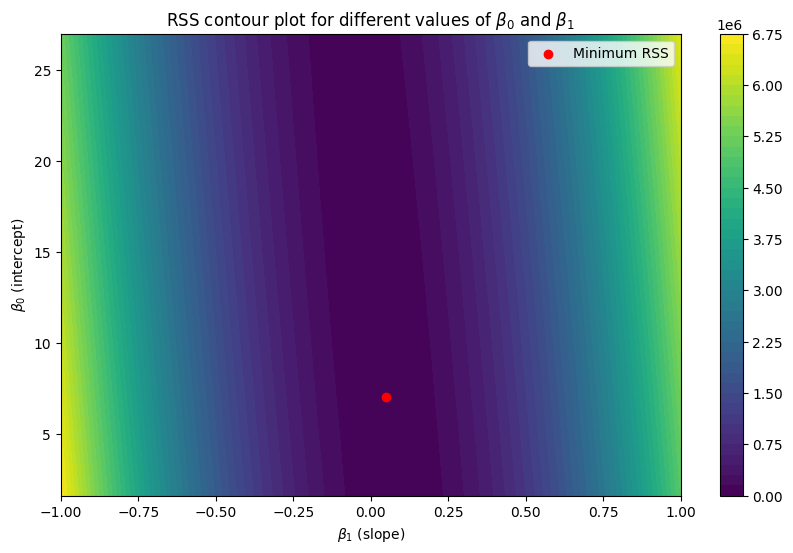

Minimum RSS at $\beta_0$ = 7.01 and $\beta_1$ = 0.05


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://riotu-lab.org/cs313/advertising.csv"
data = pd.read_csv(url)

# Extract TV advertising budget and sales data
X = data['TV']
Y = data['Sales']

# Function to calculate RSS
def compute_rss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Grid of beta0 (intercept) and beta1 (slope) values
beta0_values = np.linspace(Y.min(), Y.max(), 400)
beta1_values = np.linspace(-1, 1, 400)

# Calculate RSS for each combination of beta0 and beta1
RSS = np.zeros((len(beta0_values), len(beta1_values)))
for i, b0 in enumerate(beta0_values):
    for j, b1 in enumerate(beta1_values):
        Y_pred = b0 + b1 * X
        RSS[i, j] = compute_rss(Y, Y_pred)

# Find the indices of the minimum RSS
i_min, j_min = np.unravel_index(np.argmin(RSS), RSS.shape)
beta0_min, beta1_min = beta0_values[i_min], beta1_values[j_min]

# Create contour plot
plt.figure(figsize=(10, 6))
cp = plt.contourf(beta1_values, beta0_values, RSS, 50, cmap='viridis')
plt.colorbar(cp)
plt.scatter([beta1_min], [beta0_min], color='red', label='Minimum RSS')
plt.title('RSS contour plot for different values of $\\beta_0$ and $\\beta_1$')
plt.xlabel('$\\beta_1$ (slope)')
plt.ylabel('$\\beta_0$ (intercept)')
plt.legend()
plt.show()

print(f"Minimum RSS at $\\beta_0$ = {beta0_min:.2f} and $\\beta_1$ = {beta1_min:.2f}")


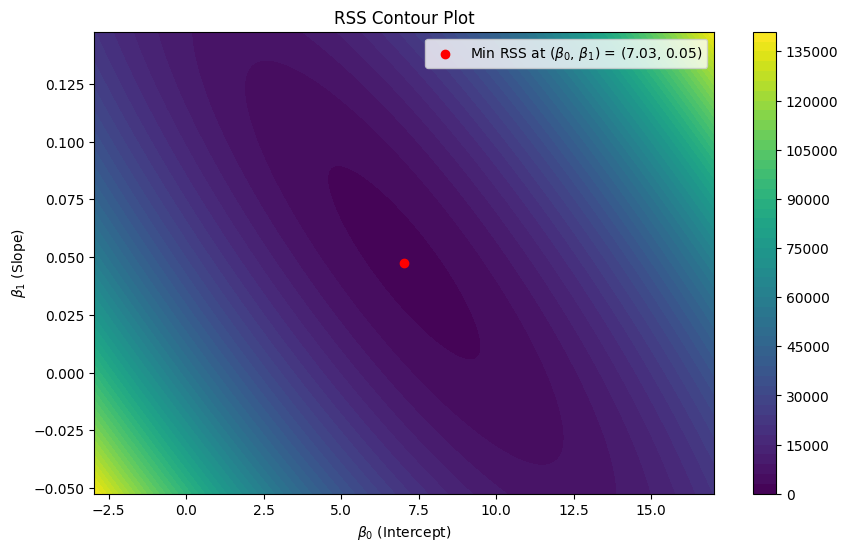

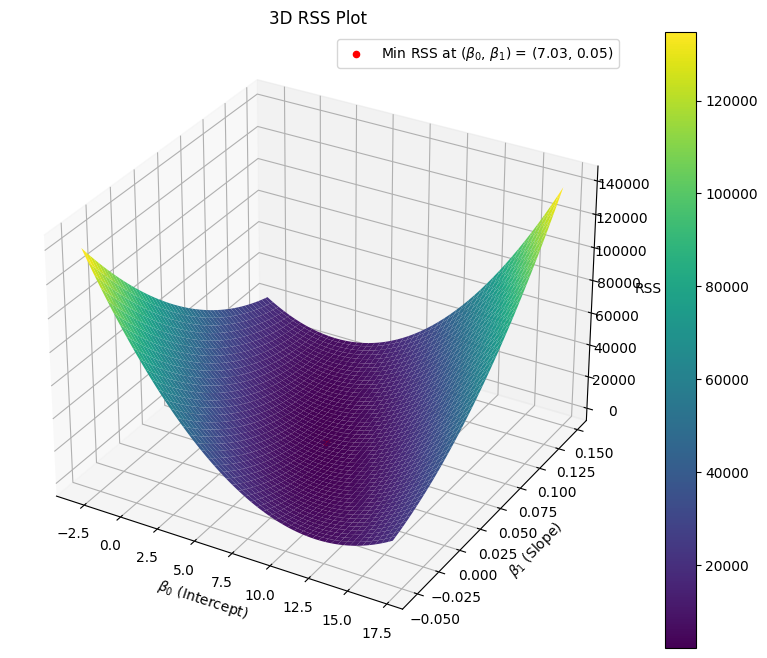

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
url = "https://riotu-lab.org/cs313/advertising.csv"
data = pd.read_csv(url)

# Extract TV advertising budget and sales data
X = data['TV']
Y = data['Sales']

# Compute the mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Compute the slope (Beta 1) and intercept (Beta 0) using least squares estimates
beta_1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

# Function to calculate RSS
def compute_rss(beta0, beta1):
    Y_pred = beta0 + beta1 * X
    return np.sum((Y - Y_pred) ** 2)

# Create a range of beta0 and beta1 values around the least squares estimates
beta0_values = np.linspace(beta_0 - 10, beta_0 + 10, 200)
beta1_values = np.linspace(beta_1 - 0.1, beta_1 + 0.1, 200)
Beta0, Beta1 = np.meshgrid(beta0_values, beta1_values)
RSS = np.array([[compute_rss(b0, b1) for b1 in beta1_values] for b0 in beta0_values])

# Contour plot
plt.figure(figsize=(10, 6))
cp = plt.contourf(Beta0, Beta1, RSS, 50, cmap='viridis')
plt.colorbar(cp)
plt.scatter([beta_0], [beta_1], color='red', label=f'Min RSS at ($\\beta_0$, $\\beta_1$) = ({beta_0:.2f}, {beta_1:.2f})')
plt.xlabel('$\\beta_0$ (Intercept)')
plt.ylabel('$\\beta_1$ (Slope)')
plt.title('RSS Contour Plot')
plt.legend()
plt.show()

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Beta0, Beta1, RSS, cmap='viridis', edgecolor='none')
fig.colorbar(surf)
ax.scatter([beta_0], [beta_1], [compute_rss(beta_0, beta_1)], color='red', label=f'Min RSS at ($\\beta_0$, $\\beta_1$) = ({beta_0:.2f}, {beta_1:.2f})')
ax.set_xlabel('$\\beta_0$ (Intercept)')
ax.set_ylabel('$\\beta_1$ (Slope)')
ax.set_zlabel('RSS')
ax.set_title('3D RSS Plot')
ax.legend()
plt.show()


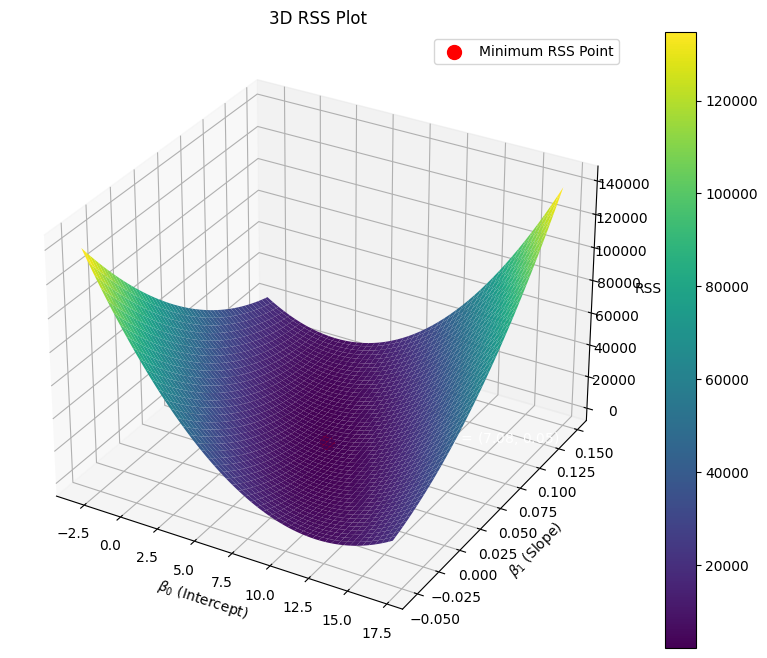

In [ ]:
# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Beta0, Beta1, RSS, cmap='viridis', edgecolor='none')
fig.colorbar(surf)

# Compute the minimum RSS point
min_rss_index = np.unravel_index(np.argmin(RSS), RSS.shape)
min_beta0 = Beta0[min_rss_index]
min_beta1 = Beta1[min_rss_index]
min_rss_value = RSS[min_rss_index]

# Highlight the minimum point
ax.scatter(min_beta0, min_beta1, min_rss_value, color='red', s=100, label='Minimum RSS Point')
ax.text(min_beta0, min_beta1, min_rss_value, f'Min RSS at ($\\beta_0$, $\\beta_1$) = ({min_beta0:.2f}, {min_beta1:.2f})', color='white')

ax.set_xlabel('$\\beta_0$ (Intercept)')
ax.set_ylabel('$\\beta_1$ (Slope)')
ax.set_zlabel('RSS')
ax.set_title('3D RSS Plot')
ax.legend()
plt.show()


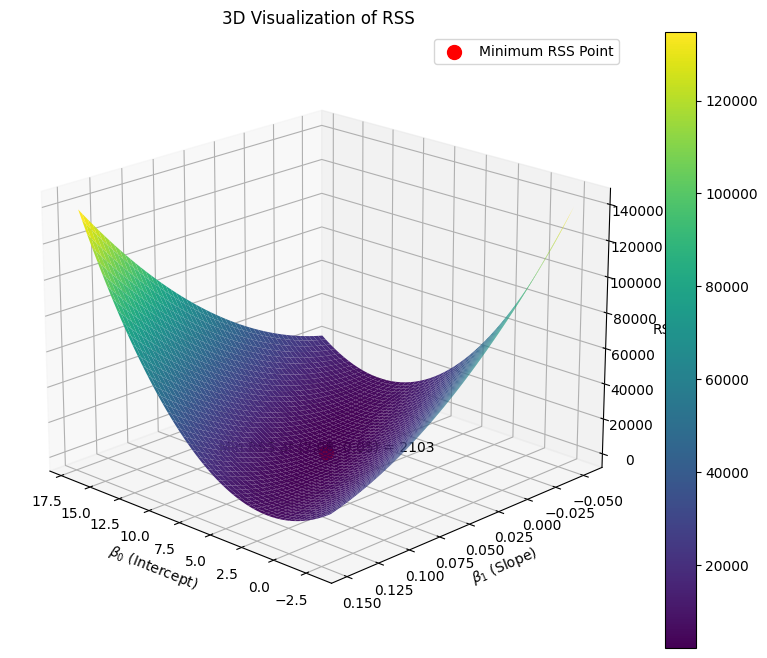

In [ ]:
# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Beta0, Beta1, RSS, cmap='viridis', edgecolor='none')
fig.colorbar(surf)

# Calculate the minimum RSS point
min_rss_index = np.unravel_index(np.argmin(RSS), RSS.shape)
min_beta0 = Beta0[min_rss_index]
min_beta1 = Beta1[min_rss_index]
min_rss_value = RSS[min_rss_index]

# Highlight the minimum point with a larger, distinct marker
ax.scatter(min_beta0, min_beta1, min_rss_value, color='red', s=100, label='Minimum RSS Point')

# Use text annotation for clarity, adjusted for better visibility
annotation_text = f"Min RSS at ({min_beta0:.2f}, {min_beta1:.2f}) = {min_rss_value:.0f}"
ax.text(min_beta0, min_beta1, min_rss_value + 10, annotation_text, color='black', fontsize=10, ha='center')

# Adjust viewing angle for better visibility of the text
ax.view_init(elev=20, azim=134)  # These angles can be adjusted for the best view

ax.set_xlabel('$\\beta_0$ (Intercept)')
ax.set_ylabel('$\\beta_1$ (Slope)')
ax.set_zlabel('RSS')
ax.set_title('3D Visualization of RSS')
ax.legend()
plt.show()


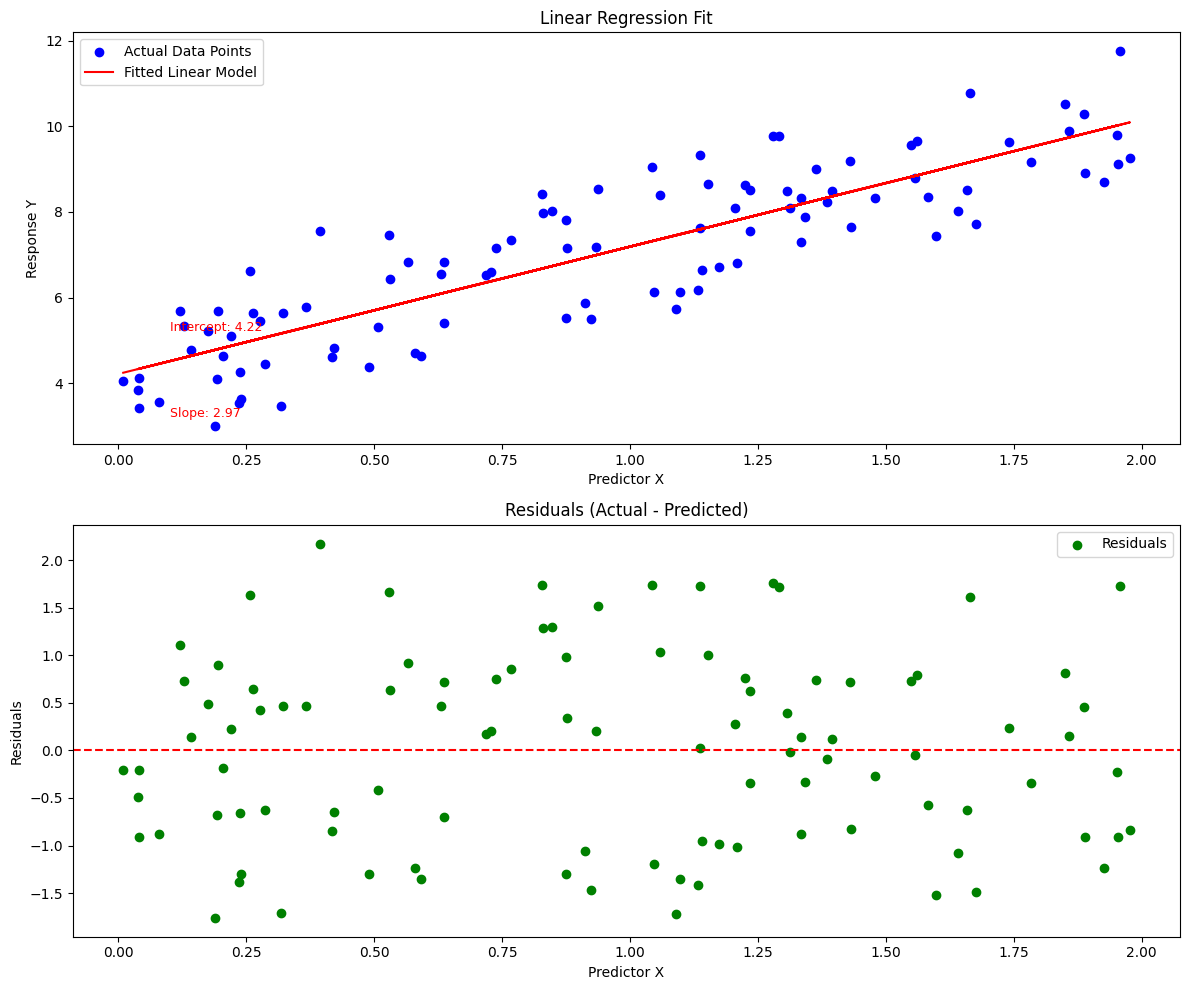

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
true_beta_0 = 4
true_beta_1 = 3
noise = np.random.randn(100, 1)
Y = true_beta_0 + true_beta_1 * X + noise

# Fit a linear regression to the data
model = LinearRegression()
model.fit(X, Y)  # Assuming Y is a column vector similar to X
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred
residuals_flat = residuals.ravel()  # Use ravel() to ensure 1D array

# Flatten X for consistent plotting
X_flat = X.ravel()  # Use ravel() to ensure 1D array

# Plotting
plt.figure(figsize=(12, 10))

# Scatter plot of the original data
plt.subplot(2, 1, 1)
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', label='Fitted Linear Model')
plt.title('Linear Regression Fit')
plt.xlabel('Predictor X')
plt.ylabel('Response Y')
plt.legend()

# Annotate slope and intercept
intercept_text = f'Intercept: {model.intercept_[0]:.2f}' if isinstance(model.intercept_, np.ndarray) else f'Intercept: {model.intercept_:.2f}'
slope_text = f'Slope: {model.coef_[0].item():.2f}' if model.coef_.ndim > 0 else f'Slope: {model.coef_:.2f}'

plt.text(0.1, model.intercept_ + 1, intercept_text, fontsize=9, color='red')
plt.text(0.1, model.intercept_ - 1, slope_text, fontsize=9, color='red')

# Residual plot
plt.subplot(2, 1, 2)
plt.scatter(X_flat, residuals_flat, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Predictor X')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


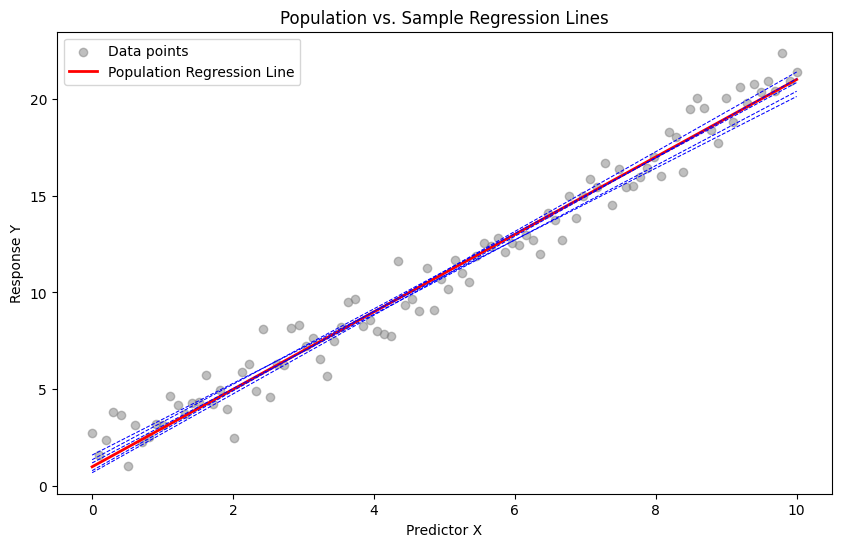

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2*x + 1  # True relationship
y = y_true + np.random.normal(size=x.size)  # Observed data with noise

# Generate multiple sample lines
coefficients = []
for _ in range(5):
    sample_indices = np.random.choice(len(x), size=15, replace=False)
    x_sample = x[sample_indices]
    y_sample = y[sample_indices]
    coef = np.polyfit(x_sample, y_sample, 1)
    coefficients.append(coef)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', alpha=0.5, label='Data points')

# Plot true population regression line
plt.plot(x, y_true, color='red', linewidth=2, label='Population Regression Line')

# Plot sample least squares lines
for coef in coefficients:
    plt.plot(x, np.polyval(coef, x), color='blue', linestyle='--', linewidth=0.75)

plt.title('Population vs. Sample Regression Lines')
plt.xlabel('Predictor X')
plt.ylabel('Response Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Parameters
np.random.seed(0)
n_datasets = 100  # Number of datasets
n_samples = 50    # Number of samples per dataset
true_beta_0 = 4   # True intercept
true_beta_1 = 3   # True slope

# Function to generate data
def generate_data(n_samples, true_beta_0, true_beta_1):
    X = 2 * np.random.rand(n_samples, 1)
    Y = true_beta_0 + true_beta_1 * X + np.random.randn(n_samples, 1)
    X = sm.add_constant(X)  # Add constant term for intercept
    return X, Y

# Store results
results = []

# Generate data, fit models, and collect statistics
for _ in range(n_datasets):
    X, Y = generate_data(n_samples, true_beta_0, true_beta_1)
    model = sm.OLS(Y, X).fit()
    results.append({
        'Intercept Estimate': model.params[0],
        'Slope Estimate': model.params[1],
        'Intercept Std Error': model.bse[0],
        'Slope Std Error': model.bse[1],
        'Intercept t-stat': model.tvalues[0],
        'Intercept p-value': model.pvalues[0],
        'Slope t-stat': model.tvalues[1],
        'Slope p-value': model.pvalues[1]
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Calculate means of estimates and statistics
summary_stats = df_results.mean().to_frame().T

# Print the results
summary_stats

,Intercept Estimate,Slope Estimate,Intercept Std Error,Slope Std Error,Intercept t-stat,Intercept p-value,Slope t-stat,Slope p-value
0,3.986837,3.002092,0.280635,0.244894,14.444849,1.108055e-15,12.44878,1.758191e-11


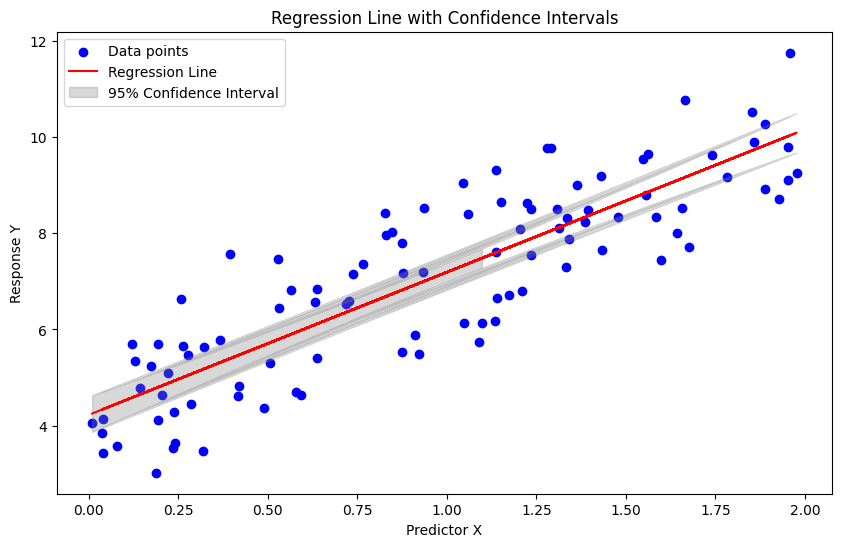

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
true_beta_0 = 4
true_beta_1 = 3
noise = np.random.randn(100, 1)
Y = true_beta_0 + true_beta_1 * X + noise
X = sm.add_constant(X)  # Add constant term for intercept

# Fit a linear regression model
model = sm.OLS(Y, X).fit()

# Generate predictions and confidence intervals
predictions = model.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals
Y_pred = prediction_summary['mean']
ci_lower = prediction_summary['mean_ci_lower']
ci_upper = prediction_summary['mean_ci_upper']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, color='blue', label='Data points')
plt.plot(X[:, 1], Y_pred, color='red', label='Regression Line')
plt.fill_between(X[:, 1], ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('Regression Line with Confidence Intervals')
plt.xlabel('Predictor X')
plt.ylabel('Response Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seed the random number generator for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
true_beta_0 = 4
true_beta_1 = 3
noise = np.random.randn(100, 1)
Y = true_beta_0 + true_beta_1 * X + noise
X = sm.add_constant(X)  # Add constant term for intercept

# Fit a linear regression model
model = sm.OLS(Y, X).fit()
# Print the summary of the regression model to get p-values and other statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           5.29e-31
Time:                        09:47:40   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.000       3.839       4.606
x1             2.9685      0.175     17.009      0.000       2.622       3.315
==============================================================================
Omnibus:                       11.746   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.097
Skew:                           0.138   Prob(JB):                        0.129
Kurtosis:                       2.047   Cond. No.                         3.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

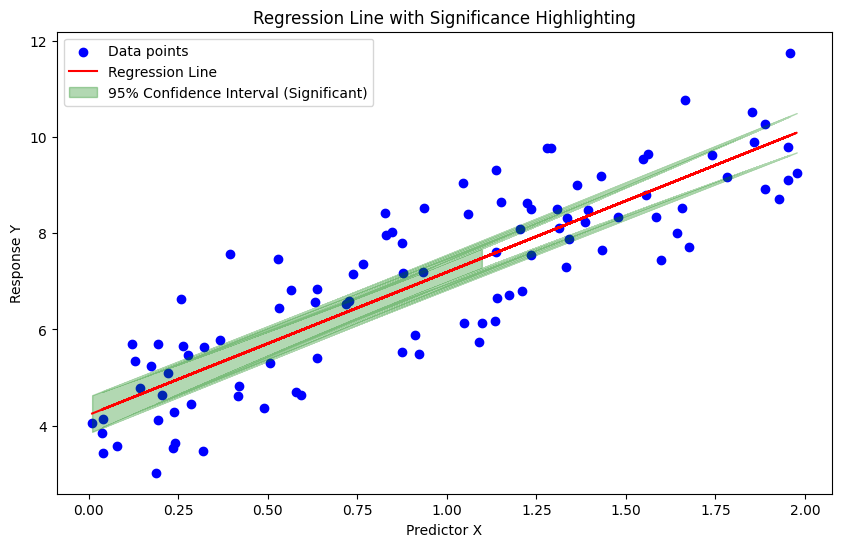

In [ ]:
# Predictions for plotting
predictions = model.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals
Y_pred = prediction_summary['mean']
ci_lower = prediction_summary['mean_ci_lower']
ci_upper = prediction_summary['mean_ci_upper']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], Y, color='blue', label='Data points')
plt.plot(X[:, 1], Y_pred, color='red', label='Regression Line')

# Highlight regions of statistical significance
significant_indices = model.pvalues[1] < 0.05  # Assuming X1 is at index 1
if significant_indices:
    plt.fill_between(X[:, 1], ci_lower, ci_upper, color='green', alpha=0.3, label='95% Confidence Interval (Significant)')
else:
    plt.fill_between(X[:, 1], ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

plt.title('Regression Line with Significance Highlighting')
plt.xlabel('Predictor X')
plt.ylabel('Response Y')
plt.legend()
plt.show()


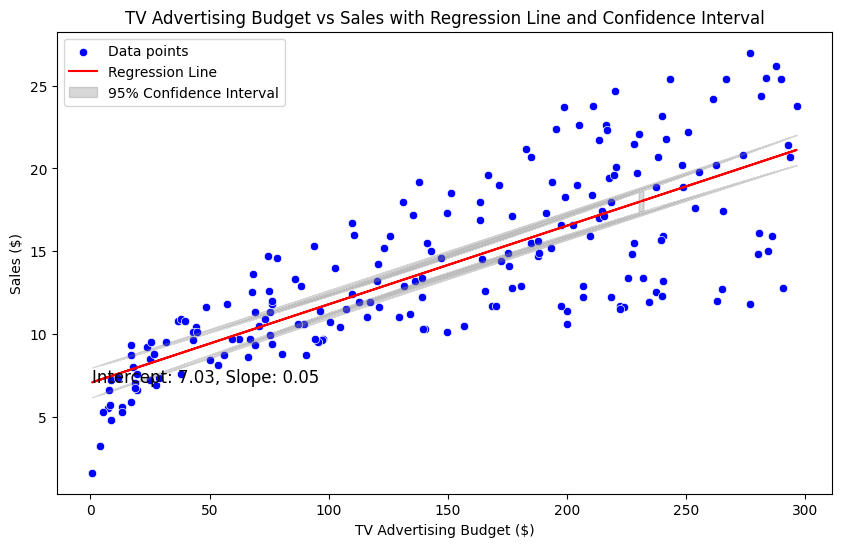

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the advertising data set
df = pd.read_csv("https://riotu-lab.org/cs313/advertising.csv")

# Add a constant to the model (the intercept)
X = sm.add_constant(df['TV'])  # Add a constant for the intercept term
Y = df['Sales']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Predictions for plotting
predictions = model.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals
Y_pred = prediction_summary['mean']
ci_lower = prediction_summary['mean_ci_lower']
ci_upper = prediction_summary['mean_ci_upper']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df, color='blue', label='Data points')
plt.plot(df['TV'], Y_pred, color='red', label='Regression Line')
plt.fill_between(df['TV'], ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

# Annotations
slope = model.params['TV']
intercept = model.params['const']
plt.text(df['TV'].min(), Y_pred.min(), f'Intercept: {intercept:.2f}, Slope: {slope:.2f}', fontsize=12, color='black')

plt.title('TV Advertising Budget vs Sales with Regression Line and Confidence Interval')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        10:03:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

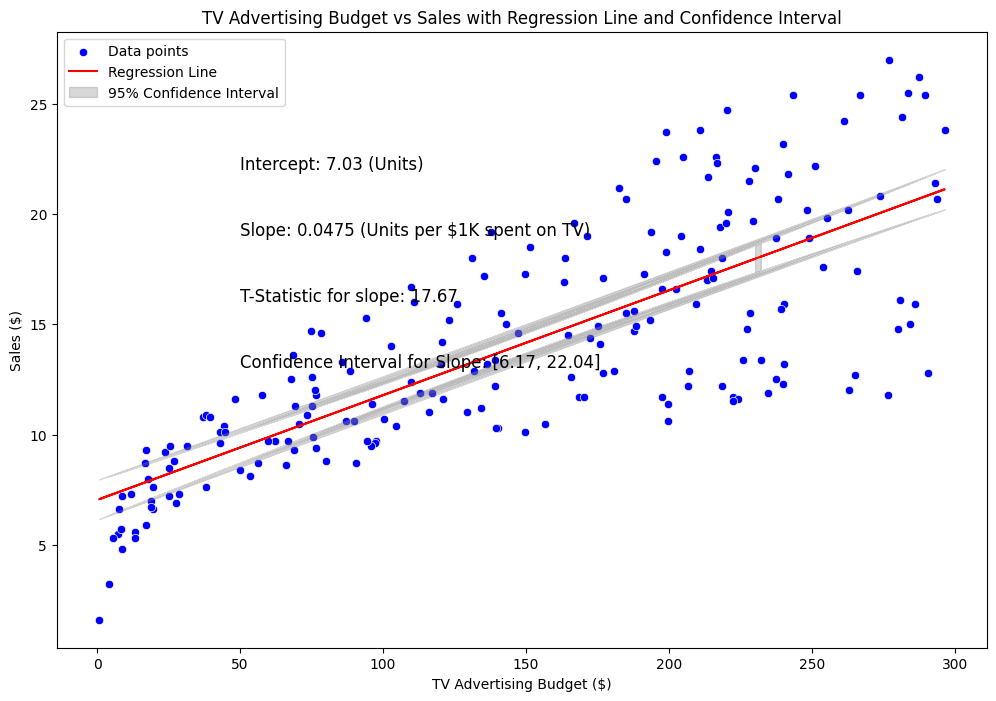

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the advertising data set
df = pd.read_csv("https://riotu-lab.org/cs313/advertising.csv")

# Add a constant to the model (the intercept)
X = sm.add_constant(df['TV'])  # Adding a constant for the intercept term
Y = df['Sales']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Predictions for plotting
predictions = model.get_prediction(X)
prediction_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals
Y_pred = prediction_summary['mean']
ci_lower = prediction_summary['mean_ci_lower']
ci_upper = prediction_summary['mean_ci_upper']

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TV', y='Sales', data=df, color='blue', label='Data points')
plt.plot(df['TV'], Y_pred, color='red', label='Regression Line')
plt.fill_between(df['TV'], ci_lower, ci_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

# Annotations for intercept, slope, and statistical significance
intercept = model.params['const']
slope = model.params['TV']
t_stat = model.tvalues['TV']
plt.text(50, ci_upper.max(), f'Intercept: {intercept:.2f} (Units)', fontsize=12, color='black')
plt.text(50, ci_upper.max() - 3, f'Slope: {slope:.4f} (Units per $1K spent on TV)', fontsize=12, color='black')
plt.text(50, ci_upper.max() - 6, f'T-Statistic for slope: {t_stat:.2f}', fontsize=12, color='black')
plt.text(50, ci_upper.max() - 9, f'Confidence Interval for Slope: [{ci_lower.min():.2f}, {ci_upper.max():.2f}]', fontsize=12, color='black')

plt.title('TV Advertising Budget vs Sales with Regression Line and Confidence Interval')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        10:36:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ci_lower.max()

20.208944340910087

In [ ]:
# Access and print the p-values
p_values = model.pvalues
print("P-values of the model coefficients:")
p_values

P-values of the model coefficients:


const    1.406300e-35
TV       1.467390e-42
dtype: float64

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
url = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
data = pd.read_csv(url, index_col=0)
X = data['TV']  # Predictor
y = data['Sales']  # Response

# Add a constant to the predictor (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Predictions
data['Predicted'] = results.predict(X)

# Calculate residuals
data['Residuals'] = data['Sales'] - data['Predicted']

# Variance of the residuals
residual_variance = np.var(data['Residuals'])

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with regression line
ax1.scatter(data['TV'], data['Sales'], color='blue', label='Actual Sales')
ax1.plot(data['TV'], data['Predicted'], color='red', label='Fitted Line')
# Highlighting residuals
for idx, row in data.iterrows():
    ax1.plot([row['TV'], row['TV']], [row['Sales'], row['Predicted']], 'k-')

ax1.set_xlabel('TV Advertising Budget ($)')
ax1.set_ylabel('Sales ($k)')
ax1.set_title('TV vs Sales with Fitted Regression Line and Residuals')
ax1.legend()

# Sidebar showing variance
ax2.bar(x=[0], height=[residual_variance], color='gray', label=f'Variance (σ²): {residual_variance:.2f}')
ax2.set_title('Residual Variance')
ax2.legend()
ax2.get_xaxis().set_visible(False)  # Hide x-axis

plt.tight_layout()
plt.show()


URLError: <urlopen error [Errno -2] Name or service not known>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://www.riotu-lab.org/cs313/adverstising.csv"
data = pd.read_csv(url)

# Let's assume we're using 'TV' as the predictor for 'Sales'
X = data[['TV']]  # Predictor
y = data['Sales']  # Response

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict sales
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Calculate Residual Standard Error (RSE)
rse = np.sqrt(mean_squared_error(y, predictions) * len(y) / (len(y) - 2))

# Plotting actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Sales')
plt.plot(X, predictions, color='red', label='Predicted Sales')
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales and Residuals')
plt.legend()

# Adding residuals to the plot
for i in range(len(X)):
    plt.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], predictions[i]], 'g-')

plt.show()

# Print the RSE
print(f"Residual Standard Error (RSE): {rse:.3f}")


HTTPError: HTTP Error 404: Not Found